In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

df = pd.read_csv('/Users/wanghansen/Desktop/Data1030 Project 1/World-Stock-Prices-Dataset.csv')
print('data types :')
print()
print(df.dtypes)
print()
print('data dims :',df.shape)

data types :

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
Brand_Name       object
Ticker           object
Industry_Tag     object
Country          object
dtype: object

data dims : (279753, 12)


## **Key Features**

Date: The date of the stock price data.  
Open: The opening price of the stock on that date.  
High: The highest price the stock reached during the trading day.  
Low: The lowest price the stock reached during the trading day.  
Close: The closing price of the stock on that date.  
Volume: The trading volume, i.e., the number of shares traded on that date.  
Dividends: Dividends paid on that date (if any).  
Stock Splits: Information about stock splits (if any).  
Brand_Name: The name of the brand or company.  
Ticker: Ticker symbol for the stock.  
Industry_Tag: The industry category or sector to which the brand belongs.  
Country: The country where the brand is headquartered or primarily operates.  

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa


In [4]:
df['Date']

0         2023-09-20 00:00:00-04:00
1         2023-09-20 00:00:00-04:00
2         2023-09-20 00:00:00-04:00
3         2023-09-20 00:00:00-04:00
4         2023-09-20 00:00:00-04:00
                    ...            
279748    2023-08-29 00:00:00-04:00
279749    2023-08-30 00:00:00-04:00
279750    2023-08-31 00:00:00-04:00
279751    2023-09-01 00:00:00-04:00
279752    2023-09-05 00:00:00-04:00
Name: Date, Length: 279753, dtype: object

In [5]:
df.isna().sum() #check is there any null value

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64

In [6]:
print('number of the company: ' ,df.Ticker.nunique())
print('number of the industry: ',df.Industry_Tag.nunique())

number of the company:  61
number of the industry:  23


In [7]:
df['Close'].describe()


count    279753.000000
mean         65.167955
std         117.190963
min           0.198861
25%          15.050000
50%          32.330002
75%          72.348923
max        2153.199951
Name: Close, dtype: float64

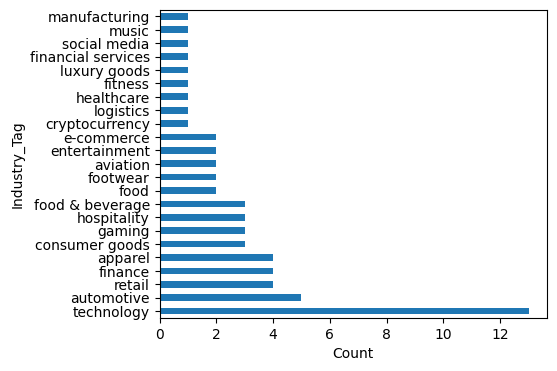

In [8]:

#We can see from the diagram that there is a 61 companies in 23 industries. In the tech industry, there is 13 companies.
plt.figure(figsize=(5,4))
industry_counts_on_date = df[df['Date'] == '2023-09-20 00:00:00-04:00']['Industry_Tag'].value_counts()
len(industry_counts_on_date)
industry_counts_on_date.plot.barh()
plt.xlabel('Count')
plt.ylabel('Industry_Tag')
plt.show()


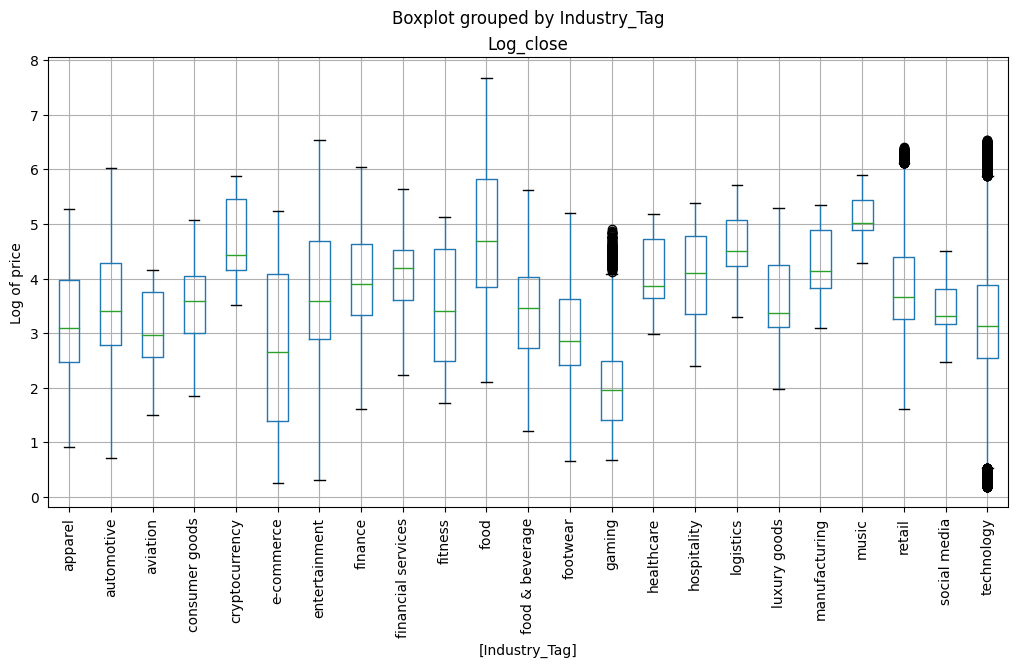

In [9]:
#df[['Volume','Industry_Tag']].boxplot(by='Industry_Tag',figsize=(12,6))
#plt.ylabel('Stock price')
#plt.xticks(rotation=90)
#plt.show()

df['Log_close'] = np.log(df['Close'] + 1)  # 对Volume进行对数变换
df[['Log_close','Industry_Tag']].boxplot(by='Industry_Tag',figsize=(12,6))
plt.ylabel('Log of price')  # 更改ylabel
plt.xticks(rotation=90)
plt.show()



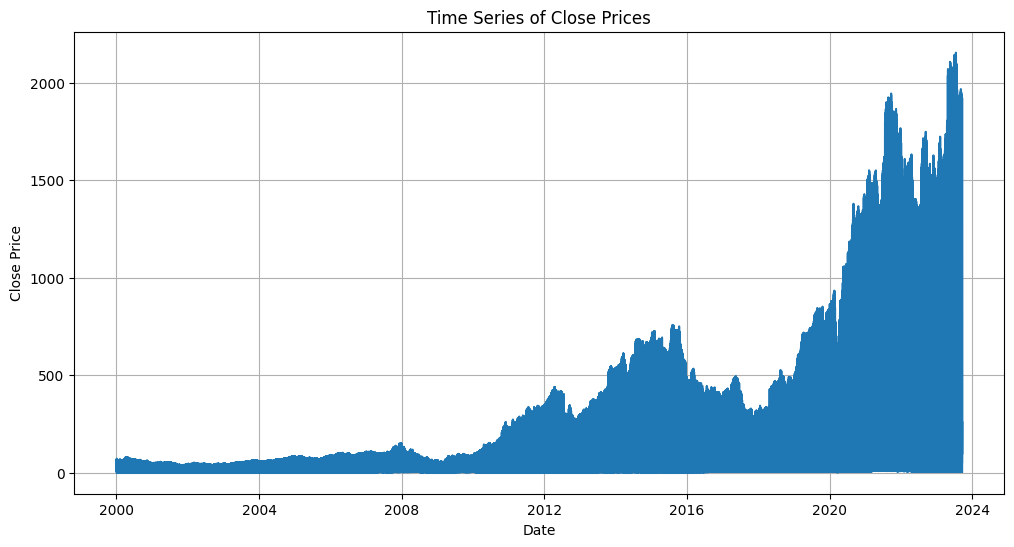

In [10]:
df['Date'] = pd.to_datetime(df['Date'], utc=True) # We want to see the total stocks price included 23 companies from 2000 to now 
df = df.sort_values(by='Date')

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

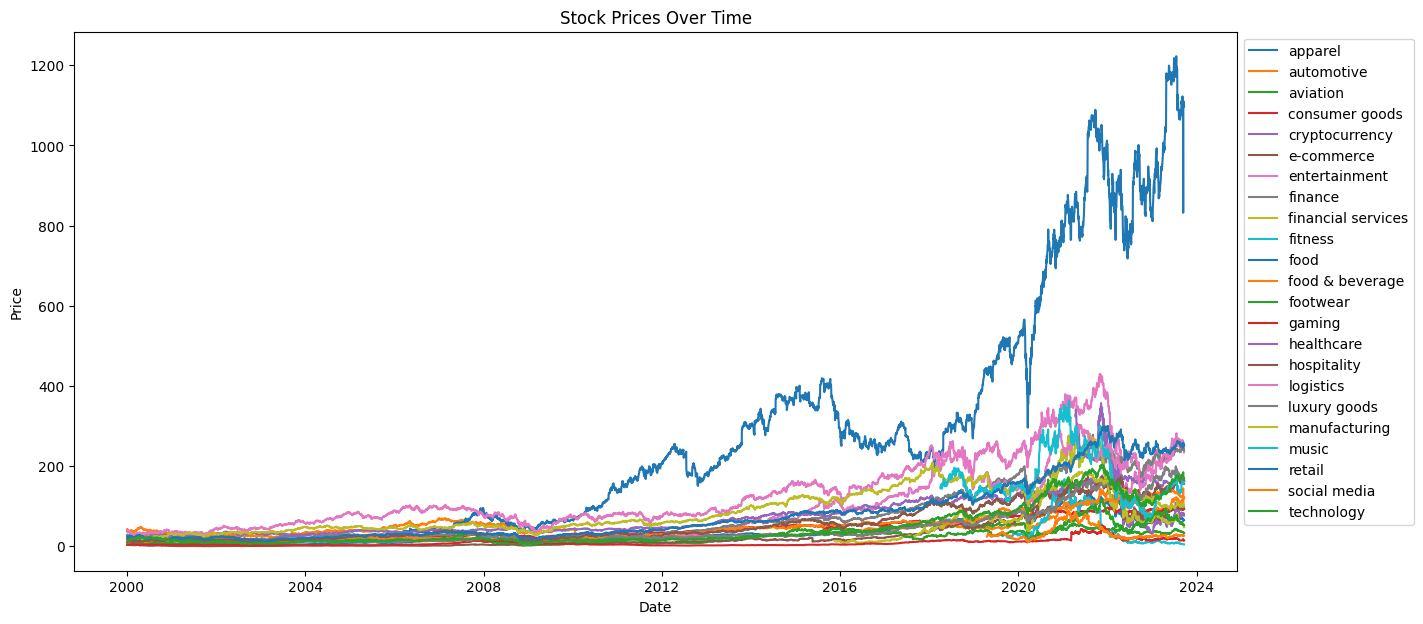

In [11]:
pivot_data = df.pivot_table(index='Date', columns='Industry_Tag', values='Close', aggfunc='mean')

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)  
plt.show()


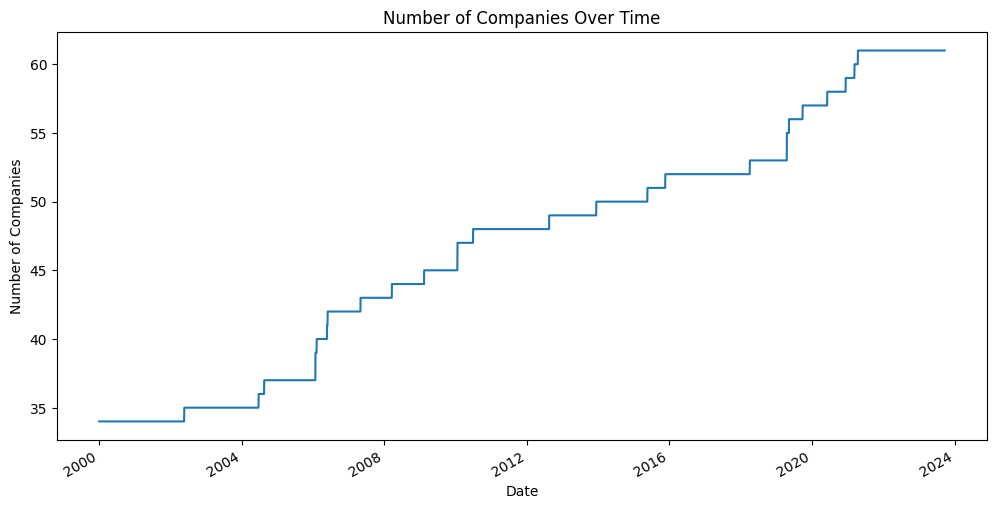

In [12]:

companies_per_date = df.groupby('Date')['Ticker'].nunique()

plt.figure(figsize=(12,6))
companies_per_date.plot()
plt.title('Number of Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Companies')
plt.show()



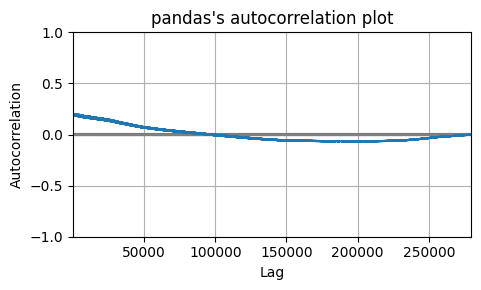

In [13]:
plt.figure(figsize=(5,3))

pd.plotting.autocorrelation_plot(df['Close'])
plt.title("pandas's autocorrelation plot")
plt.tight_layout()
plt.show()


Because the autocorrelation of Close price is move to 0, which means the data itself doesn't have any correlation through the time. Hence, we can directly split the dataset by time's length

In [14]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
df = df.sort_values(by='Date')
df.reset_index(drop=True, inplace=True)
y = df['Close']
X = df.loc[:, df.columns != 'Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.shape)
print(X_test.shape)


(223802, 12)
(55951, 12)


In [15]:
"""def group_and_recombine(df, y_series):
    grouped = df.groupby('Industry_Tag')
    recombined_df = pd.DataFrame()
    recombined_y = pd.Series()

    for _, group in grouped:
        y_group = y_series[group.index]
        recombined_df = recombined_df.append(group)
        recombined_y = recombined_y.append(y_group)

    recombined_df.reset_index(drop=True, inplace=True)
    recombined_y.reset_index(drop=True, inplace=True)
    
    return recombined_df, recombined_y

X_train, y_train = group_and_recombine(X_train, y_train)
X_val, y_val = group_and_recombine(X_val, y_val)
X_test, y_test = group_and_recombine(X_test, y_test)"""



def group_and_recombine(df, y_series):
    grouped = df.groupby('Brand_Name')
    recombined_df = pd.DataFrame()
    recombined_y = pd.Series()

    for _, group in grouped:
        y_group = y_series[group.index]
        recombined_df = recombined_df.append(group)
        recombined_y = recombined_y.append(y_group)

    recombined_df.reset_index(drop=True, inplace=True)
    recombined_y.reset_index(drop=True, inplace=True)
    
    return recombined_df, recombined_y

X_train, y_train = group_and_recombine(X_train, y_train)
X_test, y_test = group_and_recombine(X_test, y_test)
print(X_train.shape)
print(X_test.shape)

def sample_companies(df, y_series, fraction):
    unique_companies = df['Brand_Name'].unique()
    num_companies = int(len(unique_companies) * fraction)
    selected_companies = np.random.choice(unique_companies, num_companies, replace=False)
    

    sampled_df = df[df['Brand_Name'].isin(selected_companies)]
    sampled_y = y_series[sampled_df.index]

    return sampled_df, sampled_y


fraction = 0.2
X_train, y_train = sample_companies(X_train, y_train, fraction)
X_test, y_test = sample_companies(X_test, y_test, fraction)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method 

(223802, 12)
(55951, 12)
(46420, 12)
(46420,)
(11189, 12)
(11189,)


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [16]:
#Autoregression

# For the training set
X_train_lagged = pd.concat([y_train.shift(3), y_train.shift(2), y_train.shift(1)], axis=1)
X_train_lagged.columns = ['lag 3 days', 'lag 2 days', 'lag 1 day']
X_train = pd.concat([X_train, X_train_lagged], axis=1)
# For the test set
X_test_lagged = pd.concat([y_test.shift(3), y_test.shift(2), y_test.shift(1)], axis=1)
X_test_lagged.columns = ['lag 3 days', 'lag 2 days', 'lag 1 day']
X_test = pd.concat([X_test, X_test_lagged], axis=1)




# delete row which have null value by lag 
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]
#reset index of the table
X_train.reset_index(drop=True, inplace=True)
#X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
print(X_train.shape)
print(X_test.shape)




(46417, 15)
(11186, 15)


In [17]:
X_test.head()


,Date,Open,High,Low,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Log_close,lag 3 days,lag 2 days,lag 1 day
0,2020-01-14 05:00:00+00:00,168.130099,168.825810,167.898190,31400.0,0.0,0.0,adidas,ADDYY,apparel,germany,5.132837,166.758011,165.685455,167.163818
1,2020-01-15 05:00:00+00:00,169.637460,170.410475,169.366907,59000.0,0.0,0.0,adidas,ADDYY,apparel,germany,5.143497,165.685455,167.163818,168.497284
2,2020-01-16 05:00:00+00:00,169.598810,169.908007,168.748492,36500.0,0.0,0.0,adidas,ADDYY,apparel,germany,5.140673,167.163818,168.497284,170.313843
3,2020-01-17 05:00:00+00:00,167.057534,167.415047,166.390809,37900.0,0.0,0.0,adidas,ADDYY,apparel,germany,5.124594,168.497284,170.313843,169.830704
4,2020-01-21 05:00:00+00:00,166.873934,167.260449,166.226539,29800.0,0.0,0.0,adidas,ADDYY,apparel,germany,5.124364,170.313843,169.830704,167.105850


In [18]:
X_train.isna().sum() 

Date            0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
Log_close       0
lag 3 days      0
lag 2 days      0
lag 1 day       0
dtype: int64

In [19]:
X_test.isna().sum()

Date            0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
Log_close       0
lag 3 days      0
lag 2 days      0
lag 1 day       0
dtype: int64

Plotting for feature Date


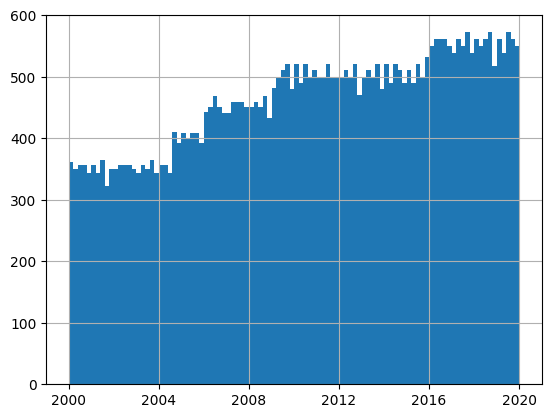

Plotting for feature Open


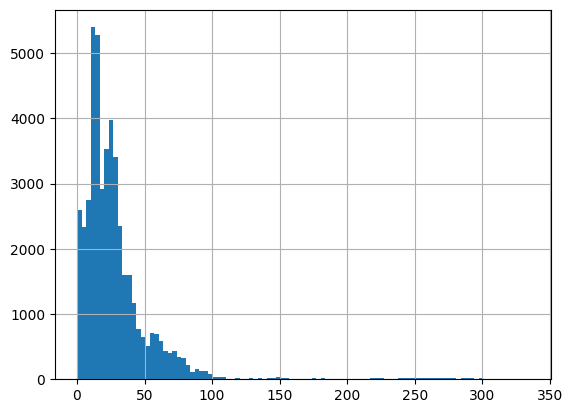

Plotting for feature High


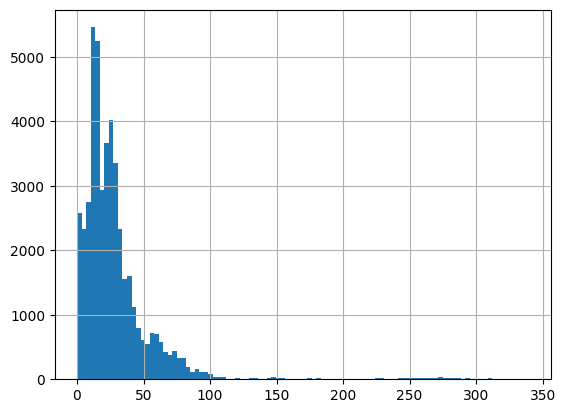

Plotting for feature Low


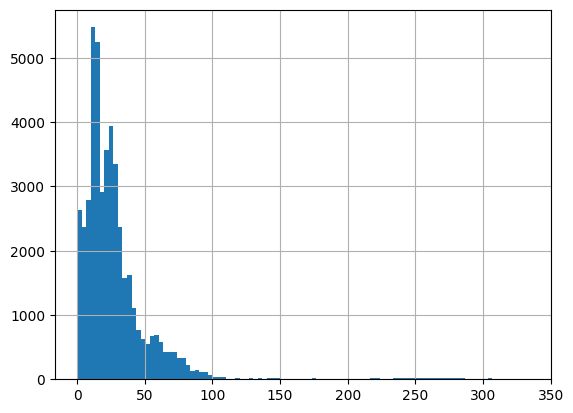

Plotting for feature Volume


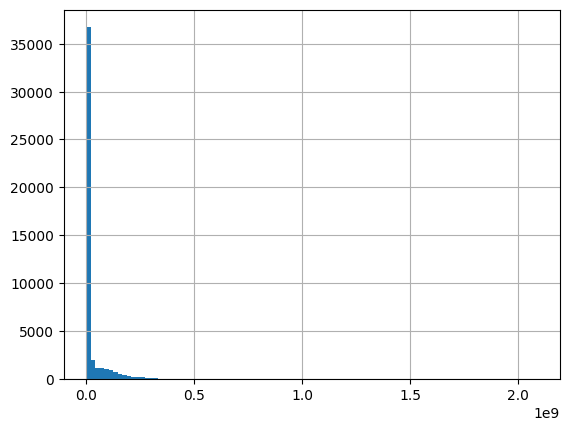

Plotting for feature Dividends


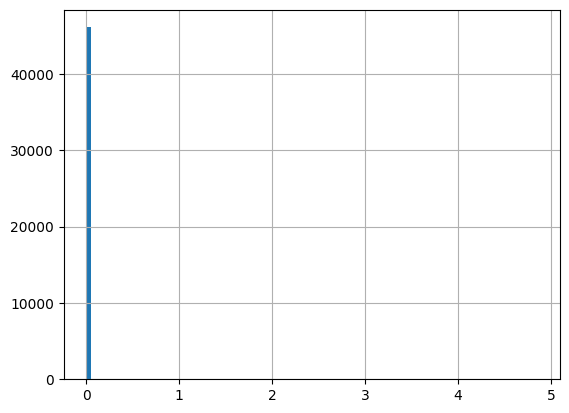

Plotting for feature Stock Splits


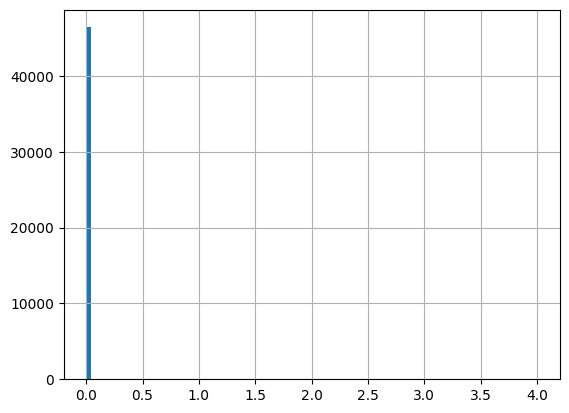

Plotting for feature Brand_Name


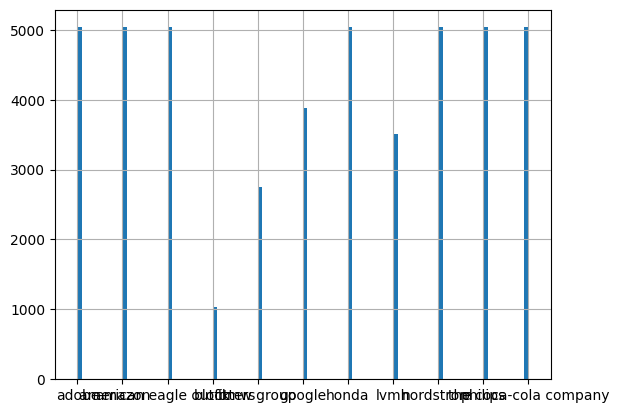

Plotting for feature Ticker


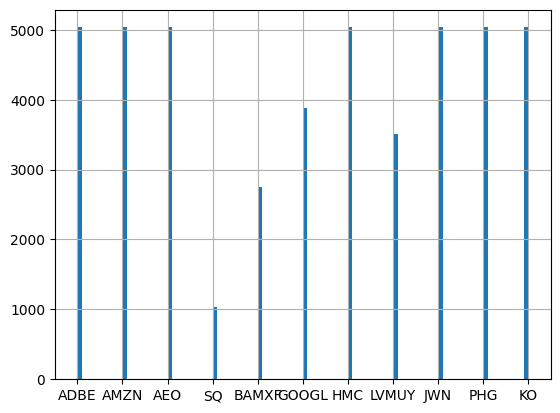

Plotting for feature Industry_Tag


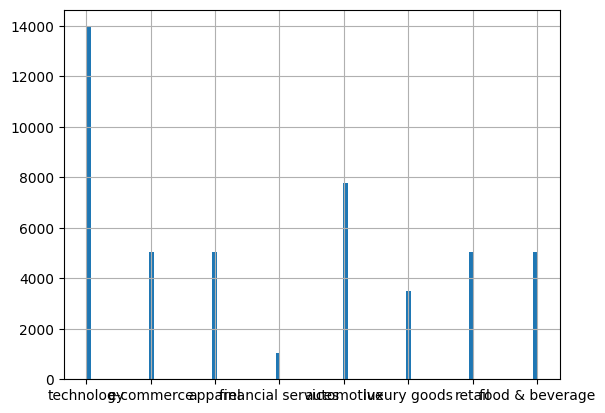

Plotting for feature Country


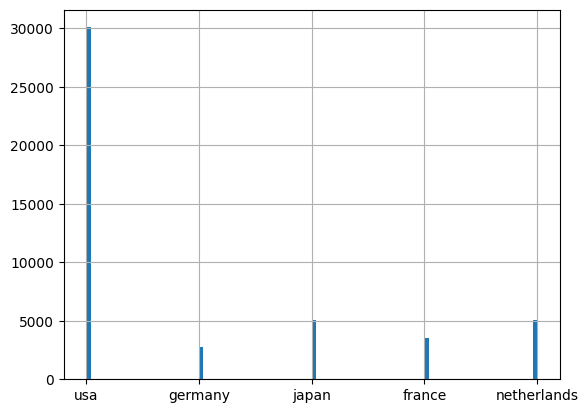

Plotting for feature Log_close


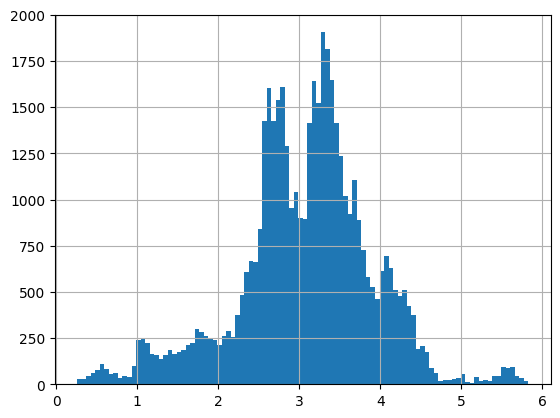

Plotting for feature lag 3 days


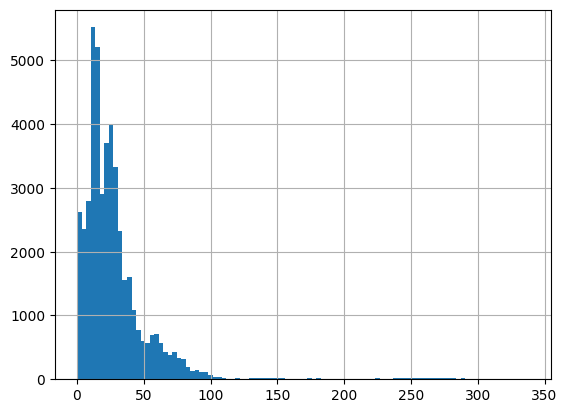

Plotting for feature lag 2 days


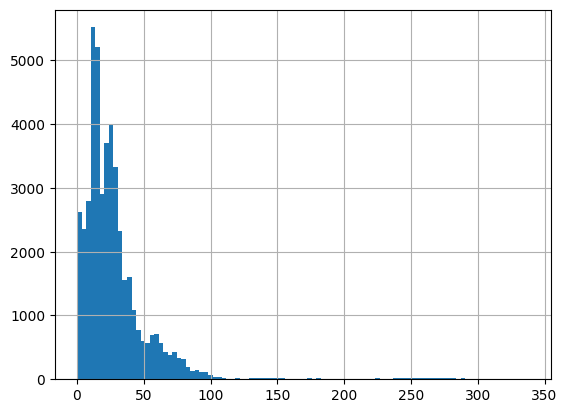

Plotting for feature lag 1 day


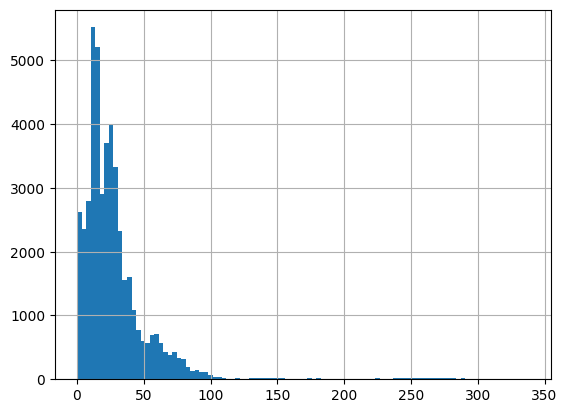

In [20]:
for col in X_train.columns:
    hist = X_train[col].hist(bins=100)
    print("Plotting for feature {}".format(col))
    plt.show()

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler



onehot_ftrs = ['Brand_Name','Ticker','Industry_Tag','Country']
minmax_ftrs = ['Volume','Dividends','Stock Splits']
std_ftrs = ['Open','High','Low','lag 3 days','lag 2 days','lag 1 day']
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess                                                     # later on we will add other steps here
X_train_prep = clf.fit_transform(X_train)
#X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)







(46417, 15)
(46417, 44)
[[ 1.          0.          0.         ... -0.40443327 -0.44691985
  -0.43777306]
 [ 1.          0.          0.         ... -0.44689893 -0.43775122
  -0.4339125 ]
 [ 1.          0.          0.         ... -0.43773029 -0.43389066
  -0.4107495 ]
 ...
 [ 0.          0.          0.         ...  0.63306733  0.62300345
   0.61461287]
 [ 0.          0.          0.         ...  0.62302682  0.61463656
   0.61405509]
 [ 0.          0.          0.         ...  0.61465992  0.61407877
   0.60234139]]


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [22]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def ML_Pipline_TimeSeriesSplit_model(X_train_prep, y_train, X_test_prep, y_test, ML_algo, param_grid):
    tscv = TimeSeriesSplit(n_splits=5)

    grid_search = GridSearchCV(ML_algo, param_grid=param_grid, 
                               scoring=make_scorer(mean_squared_error, greater_is_better=False),
                               cv=tscv, return_train_score=True)
    
    grid_search.fit(X_train_prep, y_train)

    best_model = grid_search.best_estimator_
    best_score = -grid_search.best_score_

    
    y_pred = best_model.predict(X_test_prep)
    test_mse = mean_squared_error(y_test, y_pred)

    actual_changes = np.sign(np.diff(y_test))
    predicted_changes = np.sign(np.diff(y_pred))
    wins = actual_changes == predicted_changes
    win_rate = np.mean(wins)

    
    return best_model, best_score, test_mse, win_rate


In [23]:
def rolling_forecast(train, test, y_train, y_test, model, num_predictions):
    mse_scores = []
    step_size = max(len(test) // num_predictions, 1)

    for i in range(0, len(test) - step_size, step_size):
        # Expand the training set
        X_train_expanded = train[:len(y_train) + i]
        y_train_expanded = y_train[:len(y_train) + i]

        # The test window
        X_test_window = test[i:i + step_size]
        y_test_window = y_test[i:i + step_size]

        # Train the model and make predictions
        model.fit(X_train_expanded, y_train_expanded)
        y_pred = model.predict(X_test_window)

        # Calculate MSE and append to the list
        mse = mean_squared_error(y_test_window, y_pred)
        mse_scores.append(mse)

    return mse_scores




In [24]:

ML_algo = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}


best_model_ran, best_cv_score, test_mse, win_rate = ML_Pipline_TimeSeriesSplit_model(
    X_train_prep, y_train, X_test_prep, y_test, ML_algo, param_grid
)



best_params = best_model_ran.get_params()
model_with_best_params = RandomForestRegressor(**best_params)
num_predictions = 10
mse_scores = rolling_forecast(X_train_prep, X_test_prep, y_train, y_test, model_with_best_params, num_predictions)


ran_mean_mse = np.mean(mse_scores)
ran_std_mse = np.std(mse_scores)
ran_test_MSE = test_mse
ran_win_rate = win_rate

print("Best model:", best_model_ran)
print("Best CV Score:", best_cv_score)
print("Test MSE:", ran_test_MSE)
print("Win Rate:", ran_win_rate)
print("Mean MSE:", ran_mean_mse)
print("Standard Deviation of MSE:", ran_std_mse)


Best model: RandomForestRegressor(max_depth=10, n_estimators=50)
Best CV Score: 0.08270621381519733
Test MSE: 128.14814869574974
Win Rate: 0.7385784532856504
Mean MSE: 130.15188148626206
Standard Deviation of MSE: 384.18302960033526


In [35]:
# from sklearn.linear_model import Ridge

ML_algo = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
best_model_rid, best_cv_score, test_mse, win_rate = ML_Pipline_TimeSeriesSplit_model(
    X_train_prep, y_train, X_test_prep, y_test, ML_algo, param_grid)

best_params = best_model_rid.get_params()
model_with_best_params = Ridge(**best_params)
num_predictions = 10
mse_scores = rolling_forecast(X_train_prep, X_test_prep, y_train, y_test, model_with_best_params, num_predictions)

ridge_mean_mse = np.mean(mse_scores)
ridge_std_mse = np.std(mse_scores)
ridge_test_MSE = test_mse
ridge_win_rate = win_rate

print("Best model:",best_model_rid)
print("Best CV Score:",best_cv_score)
print("Test MSE:",ridge_test_MSE)
print("Win Rate:", ridge_win_rate)
print("Mean MSE:", ridge_mean_mse)
print("Standard Deviation of MSE:", ridge_std_mse)


Best model: Ridge(alpha=1)
Best CV Score: 0.05310713493584872
Test MSE: 1.7014844180976316
Win Rate: 0.7979436745641484
Mean MSE: 1.7023076145622817
Standard Deviation of MSE: 2.9762756409923994


In [26]:
from sklearn.neighbors import KNeighborsRegressor

ML_algo = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['distance']
}
best_model_knn, best_cv_score, test_mse, win_rate = ML_Pipline_TimeSeriesSplit_model(
    X_train_prep, y_train, X_test_prep, y_test, ML_algo, param_grid)

best_params = best_model_knn.get_params()
model_with_best_params = KNeighborsRegressor(**best_params)
num_predictions = 10
mse_scores = rolling_forecast(X_train_prep, X_test_prep, y_train, y_test, model_with_best_params, num_predictions)

knn_mean_mse = np.mean(mse_scores)
knn_std_mse = np.std(mse_scores)
knn_test_MSE = test_mse
knn_win_rate = win_rate

print("Best model:",best_model_knn)
print("Best CV Score:",best_cv_score)
print("Test MSE:",knn_test_MSE)
print("win_rate:", knn_win_rate)
print("Mean MSE:", knn_mean_mse)
print("Standard Deviation of MSE:", knn_std_mse)

Best model: KNeighborsRegressor(n_neighbors=1, weights='distance')
Best CV Score: 21.163514711824128
Test MSE: 144.7607763367947
win_rate: 0.5850692892266428
Mean MSE: 144.83815919714948
Standard Deviation of MSE: 368.4019437678791


In [27]:
from sklearn.svm import SVR

ML_algo = SVR()  
param_grid = {
    'C': [0.1, 1],  
    'gamma': [0.001, 0.01]  
}
best_model_SVR, best_cv_score, test_mse, win_rate = ML_Pipline_TimeSeriesSplit_model(
    X_train_prep, y_train, X_test_prep, y_test, ML_algo, param_grid)

best_params = best_model_SVR.get_params()
model_with_best_params = SVR(**best_params)
num_predictions = 10
mse_scores = rolling_forecast(X_train_prep, X_test_prep, y_train, y_test, model_with_best_params, num_predictions)


SVR_mean_mse = np.mean(mse_scores)
SVR_std_mse = np.std(mse_scores)
SVR_test_MSE = test_mse
SVR_win_rate = win_rate

print("Best model:", best_model_SVR)
print("Best CV Score:", best_cv_score)
print("Test MSE:", SVR_test_MSE)
print("Win Rate:", SVR_win_rate)
print("Mean MSE:", SVR_mean_mse)
print("Standard Deviation of MSE:", SVR_std_mse)


Best model: SVR(C=1, gamma=0.001)
Best CV Score: 1.0851943092312974
Test MSE: 320.3991526050756
Win Rate: 0.6567724631202503
Mean MSE: 320.57033313544474
Standard Deviation of MSE: 913.2544391286011


In [28]:
# baseline MSE
y_test_shifted = y_test.shift(1).fillna(method='bfill')
baseline_mse = mean_squared_error(y_test, y_test_shifted)

print("Baseline MSE:", baseline_mse)


Baseline MSE: 20.518306169542996


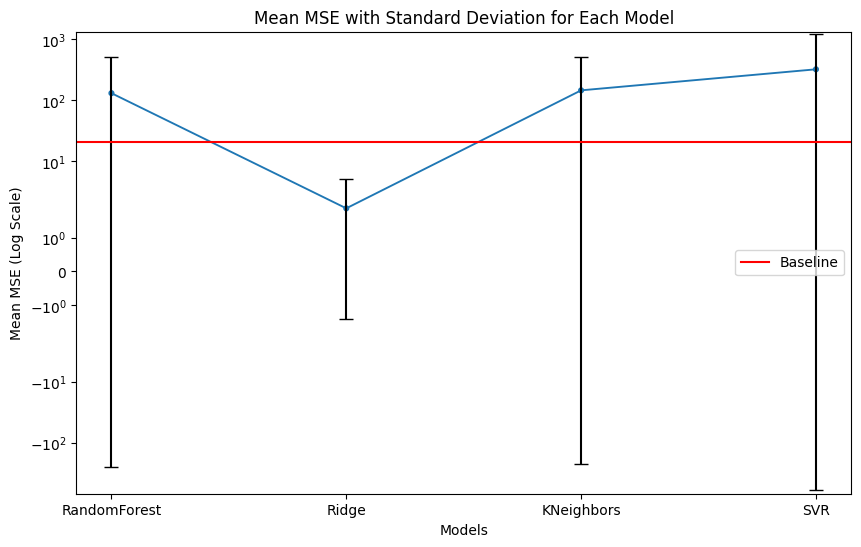

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['RandomForest', 'Ridge', 'KNeighbors', 'SVR']
mean_mses = [ran_mean_mse, ridge_mean_mse, knn_mean_mse, SVR_mean_mse]
std_mses = [ran_std_mse, ridge_std_mse, knn_std_mse, SVR_std_mse]

baseline_mse = baseline_mse

plt.figure(figsize=(10, 6))
sns.pointplot(x=models, y=mean_mses, scale=0.5)
plt.errorbar(x=models, y=mean_mses, yerr=std_mses, fmt='none', capsize=5, color='black')
plt.axhline(y=baseline_mse, color='r', linestyle='-', label='Baseline')
plt.yscale('symlog')
plt.xlabel('Models')
plt.ylabel('Mean MSE (Log Scale)')
plt.title('Mean MSE with Standard Deviation for Each Model')
plt.legend()

plt.savefig("mean_mse_with_std.png")
plt.show()



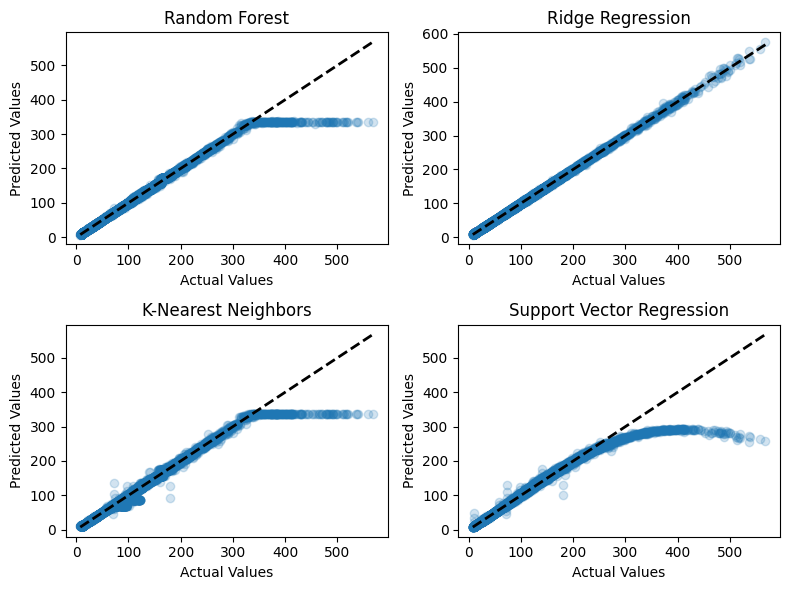

In [30]:
import matplotlib.pyplot as plt

models = [
    ('Random Forest', best_model_ran),
    ('Ridge Regression', best_model_rid),
    ('K-Nearest Neighbors', best_model_knn),
    ('Support Vector Regression', best_model_SVR)
]

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten() 

for i, (model_name, model) in enumerate(models):
    y_pred = model.predict(X_test_prep)  
    axs[i].scatter(y_test, y_pred, alpha=0.2)
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_title(model_name)
    axs[i].set_xlabel('Actual Values')
    axs[i].set_ylabel('Predicted Values')

plt.tight_layout()

plt.savefig("true_predict.png")
plt.show()



In [31]:
test_score = best_model_ran.score(X_test_prep, y_test)
print('Test score = ', test_score)

Test score =  0.9762025865926357


Test score = 0.9762025865926357
Shuffled test score for feature onehot__Brand_Name_adobe: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_amazon: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_american eagle outfitters: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_block: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_bmw group: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_google: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_honda: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_lvmh: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_nordstrom: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_philips: 0.976 +/- 0.000
Shuffled test score for feature onehot__Brand_Name_the coca-cola company: 0.976 +/- 0.000
Shuffled test score for feature onehot__Ticker_ADBE: 0.976 +/- 0.000
Shuffled test score for feature onehot

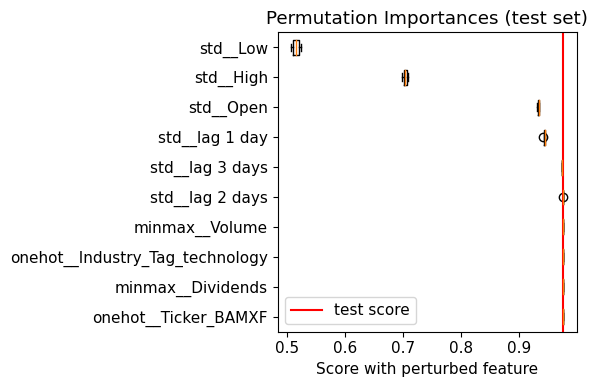

In [32]:
np.random.seed(88)
X_train_prep, X_test_prep, y_train, y_test, model_with_best_params
feature_names = preprocessor.get_feature_names_out()

nr_runs = 10
scores = np.zeros([len(feature_names), nr_runs])

test_score = best_model_ran.score(X_test_prep, y_test)
print('Test score =', test_score)

for i in range(len(feature_names)):
    shuffled_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test_prep.copy()
        shuffled_values = np.random.permutation(X_test_prep[:, i])  
        X_test_shuffled[:, i] = shuffled_values
        shuffled_score = best_model_ran.score(X_test_shuffled, y_test)
        shuffled_scores.append(shuffled_score)
    mean_shuffled_score = np.mean(shuffled_scores)
    std_shuffled_score = np.std(shuffled_scores)
    print(f'Shuffled test score for feature {feature_names[i]}: {mean_shuffled_score:.3f} +/- {std_shuffled_score:.3f}')
    scores[i] = shuffled_scores

sorted_indices = np.argsort(np.mean(scores, axis=1))[:10][::-1]

plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(6, 4))
plt.boxplot(scores[sorted_indices].T, labels=feature_names[sorted_indices], vert=False)
plt.axvline(test_score, label='test score', color='red')
plt.title("Permutation Importances (test set)")
plt.xlabel('Score with perturbed feature')
plt.legend()
plt.tight_layout()

plt.savefig("permutation importances.png")
plt.show()

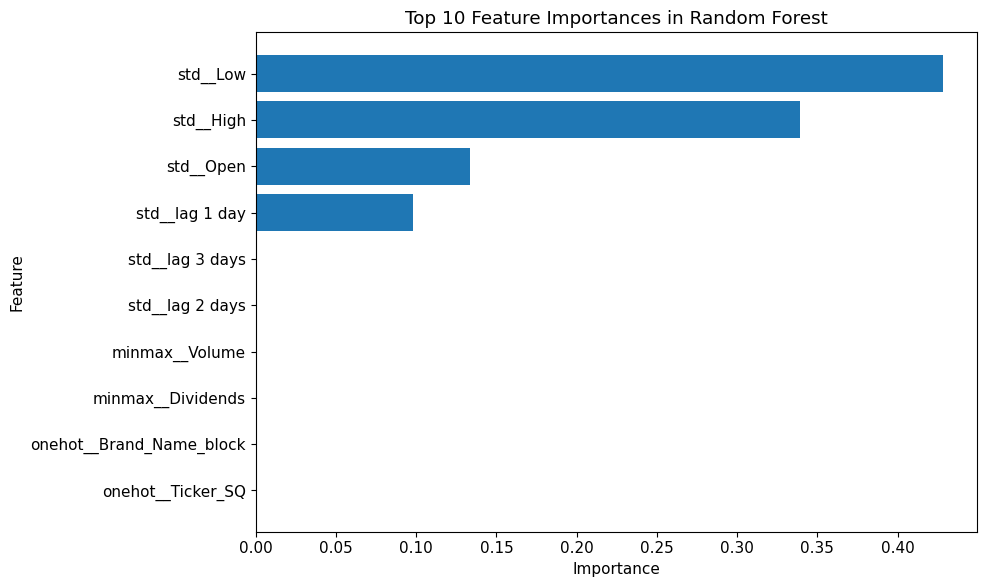

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'best_model_ran' is your trained Random Forest model and 'feature_names' are the names of the features
feature_importances = best_model_ran.feature_importances_
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
top_indices = indices[:10]  # Selecting the top 10 features
top_features = [feature_names[i] for i in top_indices]
top_importances = feature_importances[top_indices]

# Plotting with axes switched
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances in Random Forest")
plt.barh(range(10), top_importances, align='center')
plt.yticks(range(10), top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.tight_layout()
plt.show()




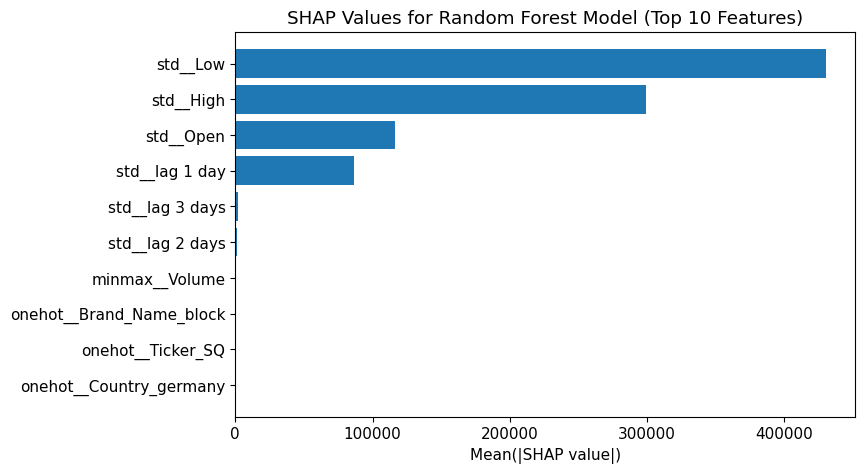

In [33]:
import shap
shap.initjs() 

explainer = shap.Explainer(best_model_ran)
X_test_transformed = X_test_prep  
shap_values = explainer(X_test_transformed)
shap_summary = np.sum(np.abs(shap_values.values), axis=0)
indcs = np.argsort(shap_summary)

plt.figure(figsize=(8, 5))
plt.barh(feature_names[indcs[-10:]], shap_summary[indcs[-10:]])
plt.xlabel('Mean(|SHAP value|)')
plt.title('SHAP Values for Random Forest Model (Top 10 Features)')

plt.savefig("SHAP.png")
plt.show()


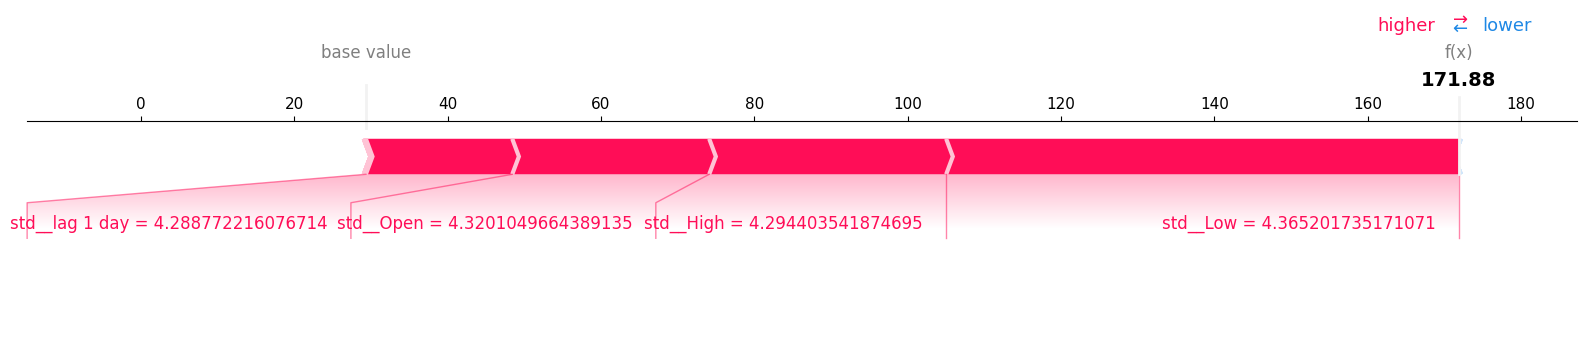

<Figure size 640x480 with 0 Axes>

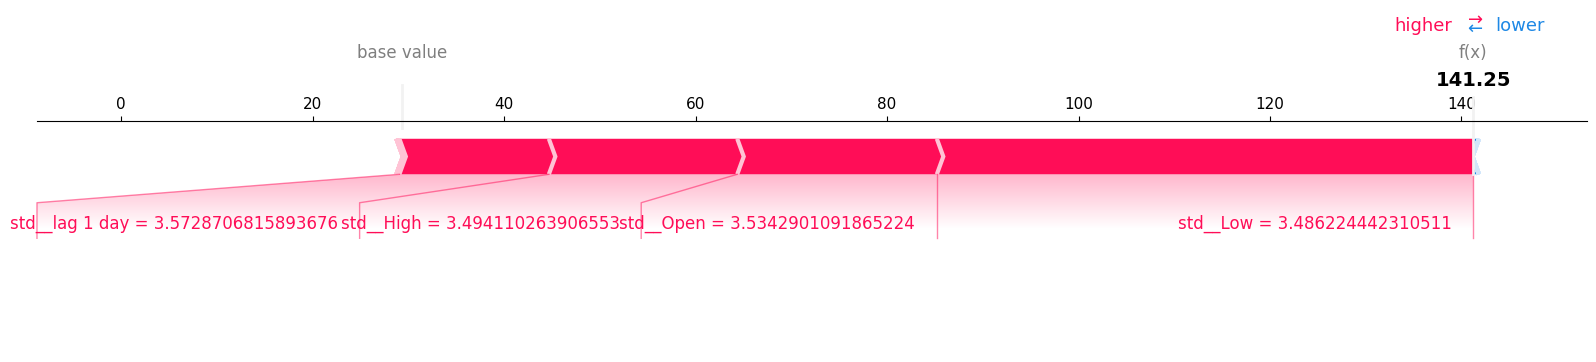

<Figure size 640x480 with 0 Axes>

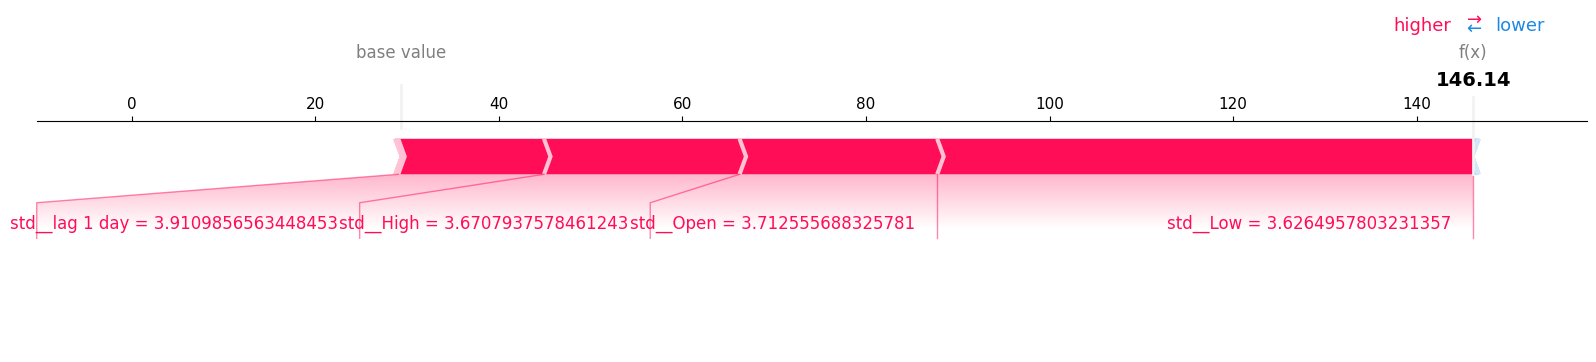

<Figure size 640x480 with 0 Axes>

In [34]:

import shap
import random
import pandas as pd
import matplotlib.pyplot as plt



X_test_df = pd.DataFrame(X_test_prep, columns=feature_names)
indices = [0, 100, 200]
shap_values_list = [shap.Explanation(values=shap_values[i], base_values=explainer.expected_value, data=X_test_df.iloc[i]) for i in indices]

for i, index in enumerate(indices):
    shap.force_plot(explainer.expected_value, shap_values_list[i].values, X_test_df.iloc[index], matplotlib=True)
    plt.savefig(f"force_plot_{index}.png")
    plt.clf() 




In [43]:
import pandas as pd

X_train_prep_df = pd.DataFrame(X_train_prep)
X_test_prep_df = pd.DataFrame(X_test_prep)
X_train_prep_df.to_csv('x_train_preprocess.csv', index=False)
X_test_prep_df.to_csv('X_test_prep_preprocess.csv', index=False)

In [44]:
import joblib
joblib.dump(best_model_ran, 'model_ran.joblib')  
joblib.dump(best_model_rid, 'model_rid.joblib')  
joblib.dump(best_model_knn, 'model_knn.joblib')  
joblib.dump(best_model_SVR, 'model_SVR.joblib')  

['model_SVR.joblib']

In [45]:
import pandas as pd

y_pred_df = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred_df.to_csv('predictions.csv', index=False)
